With the theory out of the way, let's see some code.

Imports and a random seed for repeatable results:

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

#Make results repeatable
np.random.seed(1) 

Now let's make some fake data.
Our line will be y = 2x + 0.9, with some noise.


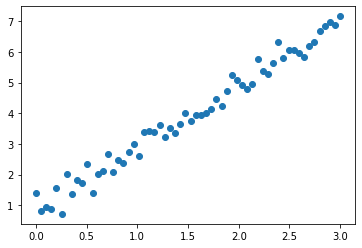

In [3]:
NUM_EXAMPLES = 60

#Fake line data
X = np.linspace(0, 3, 60)
Y = 2 * X + 0.9 + np.random.randn(*X.shape) * 0.3


plt.scatter(X, Y) 
plt.show() 
#see how it is basically a line? But lots of variation.

For now, let's try and predict a slope (m) and a y-intercept (b)

Let's initialize these as TF variables


In [16]:
# define tensorflow variables, which marks them as changeable
m = tf.Variable(0.5) 
b = tf.Variable(2.0) 

print(m)                    # note under the hood tf.variable type
print(m.numpy(), b.numpy()) # numpy just takes the numerical component of the variable

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>
0.5 2.0


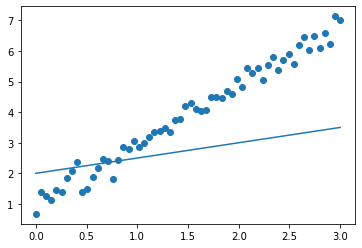

In [17]:
def plot():
  line = m*X + b    # make our line

  plt.scatter(X, Y) # plot training data
  plt.plot(X, line) # plot our line

  plt.show()

plot()

Pretty bad, yeah?

Let's train a neural network. First, we need to get those loss values so we can optimize them

In [18]:
#Tape "tapes" all of the calculations in it's scope
with tf.GradientTape(persistent=True) as tape:
  y_pred = m*X + b

  print('Predictions:', y_pred.numpy())
  print('Truth:', Y)

  loss = ((Y - y_pred) ** 2)
  print('Loss:', loss.numpy())

  loss = tf.reduce_sum(loss)
  print('Loss Summed:', loss.numpy())

  loss = loss / NUM_EXAMPLES
  print('Loss Averaged:', loss.numpy())

Predictions: [2.        2.0254238 2.0508475 2.0762713 2.1016948 2.1271186 2.1525424
 2.177966  2.20339   2.2288136 2.2542372 2.279661  2.3050847 2.3305085
 2.3559322 2.381356  2.4067798 2.4322033 2.457627  2.4830508 2.5084746
 2.5338984 2.559322  2.584746  2.6101694 2.6355932 2.661017  2.6864407
 2.7118645 2.737288  2.762712  2.7881355 2.8135593 2.838983  2.8644068
 2.8898306 2.915254  2.940678  2.9661016 2.9915254 3.0169492 3.0423727
 3.0677967 3.0932202 3.1186442 3.1440678 3.1694915 3.1949153 3.2203388
 3.2457628 3.2711864 3.29661   3.322034  3.3474576 3.3728814 3.398305
 3.423729  3.4491525 3.4745762 3.5      ]
Truth: [0.67368062 1.37755536 1.25726878 1.1156569  1.4533351  1.38580306
 1.84965831 2.06780945 2.36923194 1.39630534 1.48371501 1.86730431
 2.1683501  2.48488457 2.4184193  1.81876336 2.43525744 2.87720595
 2.7995369  3.06080674 2.86719986 2.9753658  3.19325655 3.36199855
 3.40016788 3.47807548 3.34286911 3.75903185 3.78400401 4.18799771
 4.31052282 4.1080893  4.0416518  4.

We need to find the gradient with respect to loss. Don't worry, external libraries handle this for us.

In [19]:
#calculate gradients with respect to loss
dLdm = tape.gradient(loss, m)
dLdb = tape.gradient(loss, b)
print(dLdm.numpy(), dLdb.numpy())

-5.766345 -2.3380442


Then update the values using those gradients.

0.9613076 2.1870434


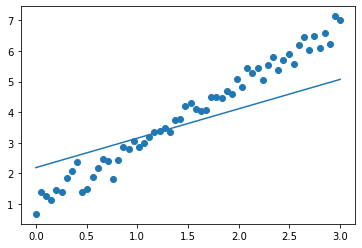

In [20]:
LEARNING_RATE = 0.08

#Update the weights!

m.assign_sub(LEARNING_RATE * dLdm) # This is also known as gradient descent
b.assign_sub(LEARNING_RATE * dLdb)

print(m.numpy(), b.numpy())
plot()

Keep clicking through those cells.
Slightly better each time right? 
You're iterating back-propagation!
Let's streamline that process by wrapping everything in a function, and doing it many times.

Epoch:  0
Loss: 3.0727269649505615
y = 1.92x + 1.08
Epoch:  10
Loss: 3.0727269649505615
y = 1.97x + 1.01
Epoch:  20
Loss: 3.0727269649505615
y = 1.98x + 0.98
Epoch:  30
Loss: 3.0727269649505615
y = 1.99x + 0.96
Epoch:  40
Loss: 3.0727269649505615
y = 2.00x + 0.95
Epoch:  50
Loss: 3.0727269649505615
y = 2.00x + 0.94
Epoch:  60
Loss: 3.0727269649505615
y = 2.00x + 0.94
Epoch:  70
Loss: 3.0727269649505615
y = 2.00x + 0.94


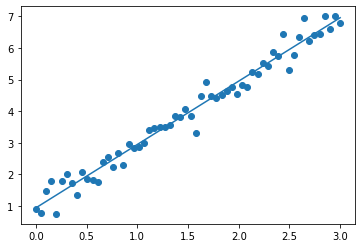

In [23]:
def train_step():
  with tf.GradientTape(persistent=True) as tape:
    y_pred = m*X + b
    loss = ((Y - y_pred) ** 2)
    loss = tf.reduce_sum(loss)
    loss = loss / NUM_EXAMPLES
  

  m_gradient = tape.gradient(loss, m)
  b_gradient = tape.gradient(loss, b)

  LEARNING_RATE = 0.08
  
  m.assign_sub(LEARNING_RATE * m_gradient) 
  b.assign_sub(LEARNING_RATE * b_gradient)
  return m.numpy(), b.numpy()

EPOCHS = 80
for i in range(EPOCHS):
  mp, bp = train_step()
  if i%10 == 0: #Only want a few prints to get the point across
      print(
      f'Epoch:  {i}\n'
      f'Loss: {loss.numpy()}\n'
      f'y = {mp:.2f}x + {bp:.2f}'
    )
  train_step()
plot()

How's that? In this case, we did everything from scratch, and forced the network to approximate a slope and y-intercept. It doesn't have to do that though, we could just give it the points and let layers worry about why this function behaves the way it does. Neural networks can approximate *anything*, that's what makes them so ubiquitous. In the following example, we do everything from here, but with keras and the "predict" function.

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 18.3834 - mean_absolute_error: 3.9156 - mean_squared_error: 18.3834
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.1568 - mean_absolute_error: 0.8620 - mean_squared_error: 1.1568
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1081 - mean_absolute_error: 0.2666 - mean_squared_error: 0.1081
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1800 - mean_absolute_error: 0.3352 - mean_squared_error: 0.1800
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2764 - mean_absolute_error: 0.4459 - mean_squared_error: 0.2764
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1180 - mean_absolute_error: 0.2784 - mean_squared_error: 0.1180
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2840 - mean_absolute_error: 0.4254 - mean_squared_error: 0.2840
Epoch 8/100
1/1 [======================

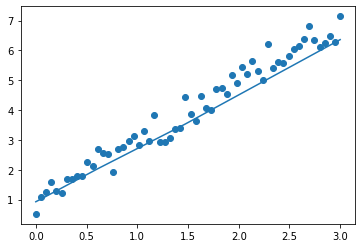

Accuracy 0.892032081150546


In [24]:
import keras

#Same data
NUM_EXAMPLES = 60

#Fake line data
X = np.linspace(0, 3, 60)
Y = 2 * X + 0.9 + np.random.randn(*X.shape) * 0.3

def make_linreg_model(data_X, data_Y):
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[1]),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.08)#This takes in our "Learning rate" from before

    model.compile(loss='mean_squared_error',
                    optimizer=optimizer,
                    metrics=['mean_absolute_error', 'mean_squared_error'])

    results = model.fit(X, Y, epochs=100, batch_size=60)
    return model

model = make_linreg_model(X, Y)


print("Model Thinks f(70) =", model.predict([70])[0][0])

print("\nPlotting the line keras thinks it knows:")
y_preds = []
for i in range(len(X)):
    pred = model.predict([X[i]])[0][0]
    y_preds.append(pred)
    if i%10==0: #Again, prettier printing
        print("Real: y = " + str(2.0) + 
        "("+str(round(X[i], 2))+")" + "+ 0.9" 
        + " ~ " + str(round(Y[i],2)), "Predicted: " + str(pred))
plt.clf()
plt.scatter(X, Y)
plt.plot(X, y_preds)
plt.show()
'''
Why such an obtuse way to show? Get used to the idea of "accuracy"
'''
accuracy = 1 - np.average([np.abs((y_preds[i] - Y[i])/Y[i]) for i in range(len(X))])
print("Accuracy", accuracy)


Here, that line is not defined by a predicted slope, rather by a series of inputs and outputs. Try adding more noise and seeing how it looks.

Now, we're going to move into more complicated approximations like images